In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets as skdt
import scipy
import matplotlib
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import OneHotEncoder 
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, complete
from sklearn.cluster import AgglomerativeClustering

In [21]:
df = pd.read_csv('fruits.csv')
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192.0,8.4,7.3,0.55
1,1,apple,granny_smith,180.0,8.0,6.8,0.59
2,1,apple,granny_smith,176.0,7.4,7.2,0.60
3,2,mandarin,mandarin,86.0,6.2,4.7,0.80
4,2,mandarin,mandarin,84.0,6.0,4.6,0.79


In [29]:
df.keys()

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    60 non-null     int64  
 1   fruit_name     60 non-null     object 
 2   fruit_subtype  60 non-null     object 
 3   mass           51 non-null     float64
 4   width          60 non-null     float64
 5   height         51 non-null     float64
 6   color_score    60 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.4+ KB


In [31]:
df.isna().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             9
width            0
height           9
color_score      0
dtype: int64

In [32]:
print(f'panjang dataset {len(df)} baris')

panjang dataset 60 baris


In [26]:
data = df[['fruit_label']]
label = df['fruit_name']

data_train, data_test, label_train, label_test = train_test_split(data, label, test_size=.3)

In [33]:
print(f'panjang data training {len(data_train)}',
     f'panjang label training {len(label_train)}',
     f'panjang data testing {len(data_test)}',
     f'panjang label testing {len(label_test)}',
     sep='\n')

NameError: name 'data_train' is not defined

In [34]:
dataset_normalisasi = df.copy()
dataset_standarirasi = df.copy()

In [35]:
scaler = MinMaxScaler()

normalize_dataset = scaler.fit_transform(dataset_normalisasi[['fruit_label', 'mass']])

normalize_dataset = pd.DataFrame(normalize_dataset)
normalize_dataset.rename(columns={ 0 :'fruit_label', 1 : 'mass'}, inplace=True)

normalize_dataset.head()

,fruit_label,mass
0,0.000000,0.003876
1,0.000000,0.003475
2,0.000000,0.003342
3,0.333333,0.000334
4,0.333333,0.000267


In [36]:
dataset_standarirasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    60 non-null     int64  
 1   fruit_name     60 non-null     object 
 2   fruit_subtype  60 non-null     object 
 3   mass           51 non-null     float64
 4   width          60 non-null     float64
 5   height         51 non-null     float64
 6   color_score    60 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.4+ KB


In [38]:
dataset_standarirasi.drop('fruit_name', axis = 1, inplace= True)

In [40]:
dataset_standarirasi.drop('fruit_subtype', axis = 1, inplace= True)

In [41]:
dataset_standarirasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fruit_label  60 non-null     int64  
 1   mass         51 non-null     float64
 2   width        60 non-null     float64
 3   height       51 non-null     float64
 4   color_score  60 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.5 KB


In [44]:
standart_std = StandardScaler()

scaled_data = standart_std.fit_transform(dataset_standarirasi)

print('Dataset sebelum scalling:',  # SEBELUM
      f'Nilai standar deviasi:\n{np.std(dataset_standarirasi)}',
      sep='\n', end='\n\n')

print('Dataset setelah scalling:',  # SESUDAH
      scaled_data[:6],
      f'Nilai standar deviasi: {np.std(scaled_data)}',
      sep='\n')

NameError: name 'np' is not defined

In [45]:
dataset_ns = df.copy()

In [46]:
imputer_mean = SimpleImputer(strategy='mean')
imputer_median = SimpleImputer(strategy='median')
imputer_modus = SimpleImputer(strategy='most_frequent')

In [47]:
df.isna().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             9
width            0
height           9
color_score      0
dtype: int64

In [48]:
dfmodus = df.copy()

In [49]:
dfmodus['fruit_name'] = imputer_modus.fit_transform(dfmodus[['fruit_name']])
dfmodus.isna().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             9
width            0
height           9
color_score      0
dtype: int64

In [51]:
df2 = pd.read_csv('fruits.csv')
df2.head()
dataset_duplicate = df2.copy()

dataset_duplicate.duplicated().sum()

2

In [52]:
dataset_duplicate.drop_duplicates(inplace=True)

dataset_duplicate.duplicated().sum()

0

In [53]:
dataset_ordinal = df.copy()
dataset_one_hot = df.copy()

In [54]:
df['fruit_name'].unique()

array(['apple', 'mandarin', 'lemon', 'orange'], dtype=object)

In [56]:
encoder_ordinal =OrdinalEncoder()

#encoding kan
dataset_ordinal['fruit_name'] = encoder_ordinal.fit_transform(dataset_ordinal[['fruit_name']]).astype('int64')

#lihat
dataset_ordinal.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,0,granny_smith,192.0,8.4,7.3,0.55
1,1,0,granny_smith,180.0,8.0,6.8,0.59
2,1,0,granny_smith,176.0,7.4,7.2,0.60
3,2,2,mandarin,86.0,6.2,4.7,0.80
4,2,2,mandarin,84.0,6.0,4.6,0.79


In [57]:
dataset_ordinal['fruit_name'].unique()

array([0, 2, 1, 3], dtype=int64)

In [58]:
temp_dataset = pd.get_dummies(dataset_one_hot[['fruit_name']])

temp_dataset = pd.DataFrame(temp_dataset)

dataset_one_hot.drop('fruit_name', axis=1, inplace=True)

dataset_one_hot = dataset_one_hot.join(temp_dataset)
dataset_one_hot.head(5)

,fruit_label,fruit_subtype,mass,width,height,color_score,fruit_name_apple,fruit_name_lemon,fruit_name_mandarin,fruit_name_orange
0,1,granny_smith,192.0,8.4,7.3,0.55,1,0,0,0
1,1,granny_smith,180.0,8.0,6.8,0.59,1,0,0,0
2,1,granny_smith,176.0,7.4,7.2,0.60,1,0,0,0
3,2,mandarin,86.0,6.2,4.7,0.80,0,0,1,0
4,2,mandarin,84.0,6.0,4.6,0.79,0,0,1,0


In [59]:
dataset =pd.read_csv('fruits.csv')
dataset.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192.0,8.4,7.3,0.55
1,1,apple,granny_smith,180.0,8.0,6.8,0.59
2,1,apple,granny_smith,176.0,7.4,7.2,0.60
3,2,mandarin,mandarin,86.0,6.2,4.7,0.80
4,2,mandarin,mandarin,84.0,6.0,4.6,0.79


In [60]:
points_linkage = dataset.iloc[:,[2,3]].values
points_complete = dataset.iloc[:,[2,3]].values

In [61]:
linkage_hr = linkage(points_linkage, method ='ward')
complete_hr = complete(points_complete)

ValueError: could not convert string to float: 'granny_smith'

In [62]:
plt.figure(1, figsize=(14, 7))
dendrogram(linkage_hr)
plt.title('Dendrogram Linkage')
plt.xlabel('data')
plt.ylabel('distance')

plt.figure(2, figsize=(14, 7))
dendrogram(complete_hr)
plt.title('Dendrogram Complete')
plt.xlabel('data')
plt.ylabel('distance')

plt.show()

NameError: name 'linkage_hr' is not defined

<Figure size 1400x700 with 0 Axes>

In [63]:
agglo_linkage = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agglo_complete = AgglomerativeClustering(n_clusters=3, affinity='euclidean')

In [64]:
pr_linkage = agglo_linkage.fit_predict(points_linkage)
pr_complete = agglo_complete.fit_predict(points_complete)

ValueError: could not convert string to float: 'granny_smith'

In [65]:
plt.figure(1, figsize=(7,7))
plt.scatter(points_linkage[pr_linkage==0,0], points_linkage[pr_linkage==0,1], 
           s=30, c='red')
plt.scatter(points_linkage[pr_linkage==1,0], points_linkage[pr_linkage==1,1], 
           s=30, c='blue')
plt.scatter(points_linkage[pr_linkage==2,0], points_linkage[pr_linkage==2,1], 
           s=30, c='green')

plt.figure(2, figsize=(7,7))
plt.scatter(points_complete[pr_linkage==0,0], points_complete[pr_linkage==0,1], 
           s=30, c='red')
plt.scatter(points_complete[pr_linkage==1,0], points_complete[pr_linkage==1,1], 
           s=30, c='blue')
plt.scatter(points_complete[pr_linkage==2,0], points_complete[pr_linkage==2,1], 
           s=30, c='green')

plt.show()

NameError: name 'pr_linkage' is not defined

<Figure size 700x700 with 0 Axes>

In [66]:
points_linkage[pr_linkage==0,0]

NameError: name 'pr_linkage' is not defined

In [67]:
bt_array = pd.read_csv('fruits.csv')
type(bt_array)

pandas.core.frame.DataFrame

In [68]:
df_bt = pd.read_csv('fruits.csv')
df_bt.head(5)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192.0,8.4,7.3,0.55
1,1,apple,granny_smith,180.0,8.0,6.8,0.59
2,1,apple,granny_smith,176.0,7.4,7.2,0.60
3,2,mandarin,mandarin,86.0,6.2,4.7,0.80
4,2,mandarin,mandarin,84.0,6.0,4.6,0.79


In [69]:
points = df_bt[['fruit_label', 'mass']]

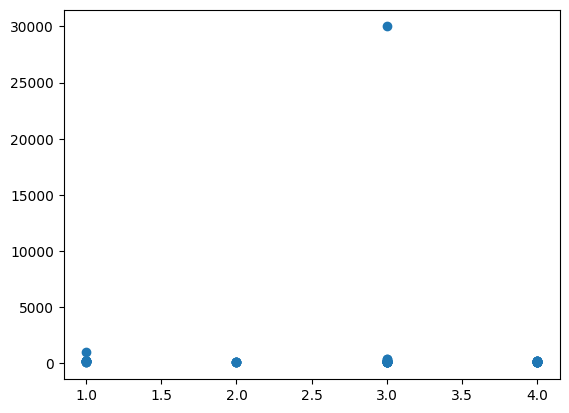

In [70]:
plt.scatter(points['fruit_label'], points['mass'])
plt.show()

In [71]:
from sklearn.cluster import KMeans

In [72]:
model = KMeans(n_clusters=2 )

In [73]:
model.fit(points)

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [74]:
labels = model.labels_

AttributeError: 'KMeans' object has no attribute 'labels_'

In [75]:
labels

NameError: name 'labels' is not defined

In [76]:
centroid = model.cluster_centers_

AttributeError: 'KMeans' object has no attribute 'cluster_centers_'

In [77]:
centroid

NameError: name 'centroid' is not defined

In [78]:
plt.scatter(points['fruit_label'], points['mass'], alpha=.5, c=labels)
plt.scatter(centroid[:,0], centroid[:,1], marker='D', s=50)
plt.show()

NameError: name 'labels' is not defined

In [79]:
cluster_sum = range(1,5)
inertia =[]

for cluster in cluster_sum:
    model = KMeans(n_clusters=cluster)
    model.fit(points)
    inertia.append(model.inertia_)
    
plt.plot(cluster_sum, inertia, '-o')
plt.xticks(cluster_sum)
plt.show()

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [80]:
bt_array.head(5)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192.0,8.4,7.3,0.55
1,1,apple,granny_smith,180.0,8.0,6.8,0.59
2,1,apple,granny_smith,176.0,7.4,7.2,0.60
3,2,mandarin,mandarin,86.0,6.2,4.7,0.80
4,2,mandarin,mandarin,84.0,6.0,4.6,0.79
